In [1]:
import keras
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
from matplotlib.colors import Normalize

def encode(series):
    return pd.get_dummies(series.astype(str))

def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(np.squeeze(y_true)), np.array(np.squeeze(y_pred))
    return np.mean(np.abs((y_true - y_pred)))


Using TensorFlow backend.


In [2]:
model = keras.models.load_model('cnnc_iter3.h5')
print(model.summary)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
<bound method Network.summary of <keras.engine.training.Model object at 0x137c3d240>>


In [7]:
#CNN Classification testing
#Import label data

temp_labels = np.loadtxt('vec_mat_clabels_icex_src_0.01train.csv',delimiter=",")
labels_t = []

for l in range(len(temp_labels)):
    labels_t.append(str(temp_labels[l]))

labels_t = np.array(labels_t)
labels_t = labels_t.ravel()

def encode(series):
    return pd.get_dummies(series.astype(str))

y_train = encode(labels_t)
labels = list(y_train.columns.values)
float_labels = [float(i) for i in labels_t]

#Import test data
features_test = np.loadtxt('vec_mat_features_icex_src_test2_norm.csv',delimiter=",")
temp_ytest = np.loadtxt('vec_mat_rlabels_icex_src_test2.csv',delimiter=",")
y_test= []

real_test = features_test[:,0::2]
imag_test = features_test[:,1::2]
X_test = np.zeros((features_test.shape[0],32,32,2))

for k in range(features_test.shape[0]):
    count = 0
    for i in range(32):
        for j in range(i,32):
            X_test[k,i,j,0] = real_test[k,count]
            X_test[k,i,j,1] = imag_test[k,count]
            
            if i!=j:
                X_test[k,j,i,0] = X_test[k,i,j,0]
                X_test[k,j,i,1] = -X_test[k,i,j,1]
            
            count = count + 1



temp_ytest = temp_ytest.ravel()
y_test = temp_ytest

#print(X_test.shape)
#print(y_test.shape)

predictions = model.predict(X_test)

pred_labels = []
for i in np.argmax(predictions, axis=1):
    pred_labels.append(float(labels[i]))
    
#print(np.shape(pred_labels))


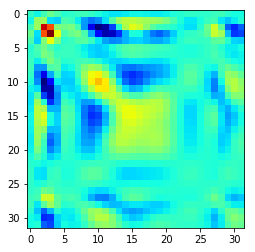

In [4]:
plt.imshow(X_test[4,:,:,0],cmap='jet')

In [ ]:
np.savetxt('oasn_cov_test2_m10db_imag.csv',np.squeeze(X_test[4,:,:,1]),delimiter=',')

In [8]:

#Classification acc
mae = mean_absolute_error(y_test, pred_labels)
diff = abs((np.transpose(pred_labels))-(y_test))
error = diff[diff>1]
percent_correct = (len(y_test)-len(error))/len(y_test)

print('Test mae:', mae)
print('Testing percent within 1km:', percent_correct*100)

Test mae: 0.17374390599999992
Testing percent within 1km: 98.9


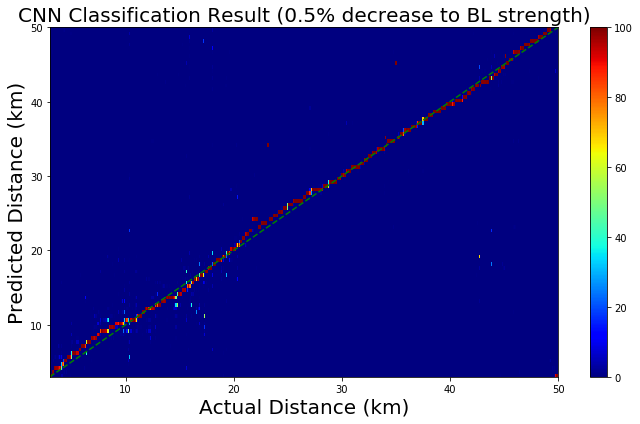

In [9]:
#sort output for plotting
inds = y_test.argsort()
sorted_y_test = y_test[inds]

floaty_pred = np.array(pred_labels).astype(np.float)
sorted_y_pred = floaty_pred[inds]


fig, ax = plt.subplots(figsize=(10,6))

c = ax.pcolormesh(sorted_y_test, np.linspace(3,50,95), predictions.T*100, cmap='jet',vmin=0, vmax=100)
ax.plot([3,50],[3,50],'g--')
ax.set_title('CNN Classification Result (0.5% decrease to BL strength)',fontsize=20)
ax.set_ylabel('Predicted Distance (km)',fontsize=20)
ax.set_xlabel('Actual Distance (km)',fontsize=20)
ax.axis([3,50, 3, 50],fontsize=20)
# set the limits of the plot to the limits of the data
#ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)
plt.tight_layout()
plt.show()


In [ ]:
fig.savefig('cnnc_testh.png')

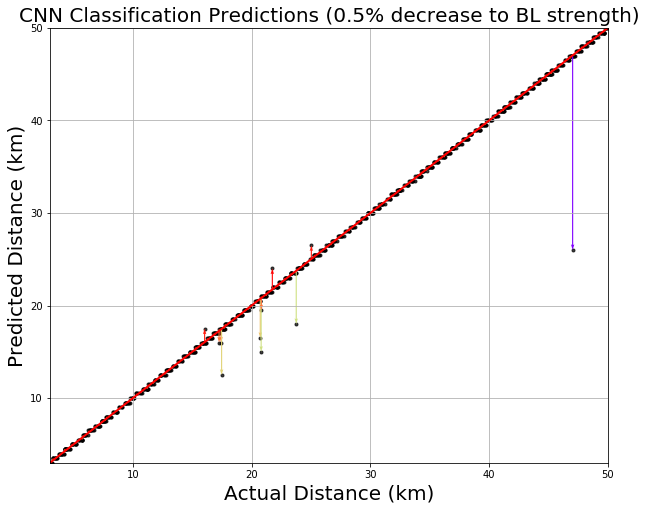

In [11]:
#classification plotting
sorted_y_pred = np.array([float(numeric_string) for numeric_string in sorted_y_pred])
sorted_y_test = np.array([float(numeric_string) for numeric_string in sorted_y_test])

colors = sorted_y_pred-sorted_y_test
norm = Normalize()
norm.autoscale(colors)
colormap = cm.rainbow
fig1 = plt.figure(figsize = (10,8))
plt.scatter(sorted_y_test,sorted_y_pred,marker='.',c='k',alpha=0.75)
plt.plot(sorted_y_test,sorted_y_test,'r',linewidth = 2)
plt.quiver(sorted_y_test, sorted_y_test, np.zeros(len(sorted_y_test)), sorted_y_pred-sorted_y_test,color=colormap(norm(colors)),angles='xy', scale_units='xy', scale=1.,width=0.002)
plt.axis([3, 50, 3, 50],fontsize=20)
plt.ylabel('Predicted Distance (km)',fontsize=20)
plt.xlabel('Actual Distance (km)',fontsize=20)
plt.title('CNN Classification Predictions (0.5% decrease to BL strength)',fontsize=20)
plt.grid()

In [ ]:

sorted_y_test[152]

In [ ]:
sorted_y_pred[152]

In [ ]:
fig1.savefig('cnnc_testhp.png')

In [ ]:
#CNN Regression Testing

features_test = np.loadtxt('vec_mat_features_icex_src_test2_norm_10db.csv',delimiter=",")
temp_ytest = np.loadtxt('vec_mat_rlabels_icex_src_test2.csv',delimiter=",")
y_test= []

real_test = features_test[:,0::2]
imag_test = features_test[:,1::2]
X_test = np.zeros((features_test.shape[0],32,32,2))

for k in range(features_test.shape[0]):
    count = 0
    for i in range(32):
        for j in range(i,32):
            X_test[k,i,j,0] = real_test[k,count]
            X_test[k,i,j,1] = imag_test[k,count]
            
            if i!=j:
                X_test[k,j,i,0] = X_test[k,i,j,0]
                X_test[k,j,i,1] = -X_test[k,i,j,1]
            
            count = count + 1

temp_ytest = temp_ytest.ravel()
y_test = temp_ytest


In [ ]:
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print('Test mae:', mae)

diff = abs((np.transpose(predictions))-(y_test))
error = diff[diff>.1]
percent_correct = (len(y_test)-len(error))/len(y_test)
print('Percent within 1km:', percent_correct*100)

In [ ]:
# Testing

features_test = np.loadtxt('vec_mat_features_icex_src_32km_testc.csv',delimiter=",")

real_test = features_test[0::2]
imag_test = features_test[1::2]
X_test = np.zeros((1,32,32,2))

for k in range(1):
    count = 0
    for i in range(32):
        for j in range(i,32):
            X_test[k,i,j,0] = real_test[count]
            X_test[k,i,j,1] = imag_test[count]
            
            if i!=j:
                X_test[k,j,i,0] = X_test[k,i,j,0]
                X_test[k,j,i,1] = -X_test[k,i,j,1]
            
            count = count + 1

predictions = model.predict(X_test)   

pred_labels = []
for i in np.argmax(predictions, axis=1):
    pred_labels.append(float(labels[i]))

print(pred_labels)

In [ ]:
#Regression plotting
inds = y_test.argsort()
sorted_y_test = y_test[inds]

sorted_y_pred = np.squeeze(predictions)[inds]

#Plotting
colors = sorted_y_pred-sorted_y_test
norm = Normalize()
norm.autoscale(colors)
colormap = cm.rainbow
fig1 = plt.figure(figsize = (10,8))
plt.scatter(sorted_y_test,sorted_y_pred,marker='.',c='k',alpha=0.75)
plt.plot(sorted_y_test,sorted_y_test,'r',linewidth = 2)
plt.quiver(sorted_y_test, sorted_y_test, np.zeros(len(sorted_y_test)), sorted_y_pred-sorted_y_test,color=colormap(norm(colors)),angles='xy', scale_units='xy', scale=1.,width=0.002)
plt.axis([3, 50, 3, 50],fontsize=20)
plt.ylabel('Predicted Distance (km)',fontsize=20)
plt.xlabel('Actual Distance (km)',fontsize=20)
plt.title('CNN Regression Predictions (0.5% decrease to BL strength)',fontsize=20)
plt.grid()

In [ ]:
fig1.savefig('cnnr_testh.png')

In [ ]:
#MFP test

mfp_pred = np.loadtxt('mfp_testc_pred.csv',delimiter=",")
mfp_act = np.loadtxt('mfp_testc_act.csv',delimiter=",")

mae = mean_absolute_error(mfp_act, mfp_pred)
print('Test mae:', mae)

diff = abs((np.transpose(mfp_pred))-(mfp_act))
error = diff[diff>.1]
percent_correct = (len(mfp_act)-len(error))/len(mfp_act)
print('Percent within 1km:', percent_correct*100)

In [ ]:
#Plotting
colors = mfp_pred-mfp_act
norm = Normalize()
norm.autoscale(colors)
colormap = cm.rainbow
fig1 = plt.figure(figsize = (10,8))
plt.scatter(mfp_act,mfp_pred,marker='.',c='k',alpha=0.75)
plt.plot(mfp_act,mfp_act,'r',linewidth = 2)
plt.quiver(mfp_act, mfp_act, np.zeros(len(mfp_act)), mfp_pred-mfp_act,color=colormap(norm(colors)),angles='xy', scale_units='xy', scale=1.,width=0.002)
plt.axis([3, 50, 3, 50],fontsize=20)
plt.ylabel('Predicted Distance (km)',fontsize=20)
plt.xlabel('Actual Distance (km)',fontsize=20)
plt.title('MFP Predictions (no SSP mismatch)',fontsize=20)
plt.grid()

In [ ]:
mfp_pred[128]

In [ ]:
fig1.savefig('mpf_test2.png')

In [ ]:
from keras.models import Model

layer1_model = Model(inputs=model.input,outputs=model.layers[1].output)
layer1bn_model = Model(inputs=model.input,outputs=model.layers[2].output)
layer2_model = Model(inputs=model.input,outputs=model.layers[4].output)
layer2bn_model = Model(inputs=model.input,outputs=model.layers[5].output)
layer3_model = Model(inputs=model.input,outputs=model.layers[7].output)
layer3bn_model = Model(inputs=model.input,outputs=model.layers[8].output)
flatten_model = Model(inputs=model.input,outputs=model.layers[10].output)
dense_model = Model(inputs=model.input,outputs=model.layers[11].output)

In [ ]:
#Import training data

features = np.loadtxt('vec_mat_features_icex_src_0.01train_norm.csv',delimiter=",")
labels_unstand = np.loadtxt('vec_mat_rlabels_icex_src_0.01train.csv',delimiter=",")
labels_t = []

real = features[:,0::2]
imag = features[:,1::2]
X_train = np.zeros((features.shape[0],32,32,2))

for k in range(features.shape[0]):
    count = 0
    for i in range(32):
        for j in range(i,32):
            X_train[k,i,j,0] = real[k,count]
            X_train[k,i,j,1] = imag[k,count]
            
            if i!=j:
                X_train[k,j,i,0] = X_train[k,i,j,0]
                X_train[k,j,i,1] = -X_train[k,i,j,1]
                
            count = count + 1
    
    #X_train[k,:,:,0] = X_train[k,:,:,0]/np.amax(np.abs(X_train[k,:,:,0]))
    #X_train[k,:,:,1] = X_train[k,:,:,1]/np.amax(np.abs(X_train[k,:,:,1]))        

labels_unstand = labels_unstand.ravel()
#y_train,mu,sigma_labels = std_y(labels_unstand)

y_train = labels_unstand

print(X_train.shape)
print(y_train.shape)

In [ ]:
np.savetxt('training_input_labels.tsv',y_train,delimiter='\t')
np.savetxt('training_input.tsv',features,delimiter='\t')

In [ ]:
predictions_train = model.predict(X_train)
pred_labels_train = []
for i in np.argmax(predictions_train, axis=1):
    pred_labels_train.append(float(labels[i]))

In [ ]:
layerd_output_train = dense_model.predict(X_train)
lab = np.zeros((len(float_labels),2))
lab[:,0] = np.array(float_labels)
lab[:,1] = np.array(pred_labels_train)

In [ ]:
np.savetxt('layerd_output_train_r.tsv',layerd_output_train,delimiter='\t')
np.savetxt('layerd_output_train_rlabels.tsv',lab,delimiter='\t')

In [ ]:
X = np.vstack((X_train,X_test))
Y1 = np.hstack((np.array(float_labels),y_test))
Y2 = np.hstack(((np.array(pred_labels_train)),np.array(pred_labels)))
Y = np.zeros((len(Y1),2))
Y[:,0] = Y1
Y[:,1] = Y2
print(X.shape)
print(Y1.shape)
print(Y2.shape)
print(Y.shape)


In [ ]:
x = X_test[4,:,:,:]
x = x[None,:,:,:]
layerd_output_10km_test2_m10db = dense_model.predict(x)
#Y1 = y_test
#Y2 = np.array(np.squeeze(predictions))
#Y = np.zeros((len(Y1),2))
#Y[:,0] = Y1
#Y[:,1] = Y2
print(layerd_output_10km_test2_m10db.shape)
#print(Y.shape)

In [ ]:
np.savetxt('layerd_output_testc_rlabels.tsv',Y,delimiter='\t')

In [ ]:
np.savetxt('layerd_output_10km_test2_m10db.tsv',layerd_output_10km_test2_m10db,delimiter='\t')

In [ ]:
arg = np.argsort(abs(np.squeeze(np.array(pred_labels))-np.squeeze(np.array(y_test))),)
print(y_test[arg[::-1]])

In [ ]:
plt.plot(layerd_output[0,:],'o')
plt.show()

In [ ]:
plt.plot(layerf_output[0,:])
plt.show()

In [ ]:
plt.plot(layerf_output[0,:])
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
for j in range(46):
    plt.subplot(7,7,j+1)
    plt.imshow(layer3_output[0,:,:,j],cmap='jet')
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
for j in range(12):
    plt.subplot(3,4,j+1)
    plt.imshow(layer1_output[0,:,:,j],cmap='jet')
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
for j in range(24):
    plt.subplot(5,5,j+1)
    plt.imshow(layer2_output[0,:,:,j],cmap='jet')
plt.tight_layout()
plt.show()